# Assignment 2 - Plant Classification

Project Name: COSC102 - Plant Classification <br>
Author: - Joshua Hahn<br>
Email: - jhahn@myune.edu.au<br>
Date: - 06/08/24<br>

For this project we will be looking at a dataset of plant descriptive variables that were collected at four different locations in the United states. Our task is to train a Classification <br>
Machine learning Algorithm that is able to identify which of the four locations a plant was found by using only two features from the dataset collect. We will obviously be trying to first <br>
find which two variables return the best results to use, then finding the classification algorithm that best fits the data in our dataset before finally running performance tests on our <br>
solution and coming to conclusions on our decisions and choices made throughtout the project. Without further ado... shall we!

In [347]:
# Import statements

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, label_binarize, OrdinalEncoder
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve, roc_auc_score

## Load the dataset and split the dataset into train and test sets

In [348]:
# Create a function to load in csv files.

def load_dataset(csv_file_path):
    """ Takes a string of a csv's file path and converts it to a pandas dataframe.
    param: String - CSV file path.
    return Dataframe - A pandas dataframe.
    """
    return pd.read_csv(csv_file_path)

In [349]:
# Define the file path for our data and call the load_dataset function to create our pandas object
csv_file_path = "./Plants_Dataset.csv"
plants = load_dataset(csv_file_path)

Before we start all the fun stuff we need to first take a quick look at our data to understand what we are working with and if anything is missing or if there maybe<br>
any other problems with the data.

In [350]:
# Iterate through each column in our dataframe and check for any null values
for col in plants.columns:
    print(f"Column {plants[col].name} has {plants[col].isnull().sum()} null values")

Column Site has 0 null values
Column height has 0 null values
Column mouth_diam has 0 null values
Column tube_diam has 0 null values
Column keel_diam has 0 null values
Column wingspread has 0 null values
Column hoodarea has 0 null values
Column wingarea has 0 null values
Column tubearea has 0 null values
Column tubemass_g has 0 null values
Column wingmass_g has 0 null values
Column Ca_ppm has 0 null values
Column P_ppm has 0 null values
Column K_ppm has 0 null values
Column Mg_ppm has 0 null values
Column C_pct has 0 null values
Column H_pct has 0 null values
Column N_pct has 0 null values


In [351]:
# Some data visualization to begin with
plants.head()

,Site,height,mouth_diam,tube_diam,keel_diam,wingspread,hoodarea,wingarea,tubearea,tubemass_g,wingmass_g,Ca_ppm,P_ppm,K_ppm,Mg_ppm,C_pct,H_pct,N_pct
0,TJH,654,38.4,16.6,6.4,55,63.77,33.65,87.15,3.54,0.29,717.90,997.12,10699.50,1983.40,49.43,5.50,0.93
1,TJH,413,22.2,17.2,5.9,60,21.10,7.36,44.78,1.48,0.06,392.74,876.99,9576.49,1540.73,50.24,5.63,0.94
2,TJH,610,31.2,19.9,6.7,78,28.47,15.75,56.64,2.20,0.16,402.45,1287.62,11738.73,1514.21,50.77,5.58,1.08
3,TJH,546,34.4,20.8,6.3,95,48.82,30.47,76.31,2.95,0.24,497.16,662.55,11173.37,1399.24,50.27,5.67,0.88
4,TJH,665,30.5,20.4,6.6,30,29.48,11.33,100.22,3.36,0.08,504.48,1115.53,7017.39,1964.15,50.20,5.56,0.98


In [352]:
# Print some basic information about our dataset
plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Site        80 non-null     object 
 1   height      80 non-null     int64  
 2   mouth_diam  80 non-null     float64
 3   tube_diam   80 non-null     float64
 4   keel_diam   80 non-null     float64
 5   wingspread  80 non-null     int64  
 6   hoodarea    80 non-null     float64
 7   wingarea    80 non-null     float64
 8   tubearea    80 non-null     float64
 9   tubemass_g  80 non-null     float64
 10  wingmass_g  80 non-null     float64
 11  Ca_ppm      80 non-null     float64
 12  P_ppm       80 non-null     float64
 13  K_ppm       80 non-null     float64
 14  Mg_ppm      80 non-null     float64
 15  C_pct       80 non-null     float64
 16  H_pct       80 non-null     float64
 17  N_pct       80 non-null     float64
dtypes: float64(15), int64(2), object(1)
memory usage: 11.4+ KB


Our datas mostly numerical types except for "Site" which is type object, which will be a string in the abbreviated form of where the specimen was found. An important point to take<br>
note of is there is no missing values in our dataset, therefore we won't have to replace any values. Since this assignment calls for us to choose the best two performing features <br>
from the dataset and use them to plot out our results, we don't have to think too much about how to frame our data or different combinations or statistics we could use to show patterns. <br>
We just have to solve the problem that is asked, which is very straight forward and will therefore cut out alot of the thinking. So without wasting anymore precious characters..... <br>
lets split up our data and go from there.


ONE MORE THING! <br>
Since we will be training a classifier to pick which site a plant was found in, and our sites are in the form of strings, we will have to convert these to some kind of number system. <br>
We will start by using the ordinal encoder to convert each value into a int since we have four different sites, this will result in each site being convert to either a 0, 1, 2, 3... shall we.

In [353]:
# We create a subset of our dataset that only contains our site column aka our label values
sites = plants[["Site"]]

# Create our encoder
encoder = OrdinalEncoder()

# fit our encoder with our labels
sites_encoded = encoder.fit_transform(sites)

# quick check of our encoded data to make sure it worked
# sites_encoded
# encoder.categories_

In [354]:
# Split our data into the train and test sets. Since we are training an algorithm to learn which site locations our plants are found 
# we will obviously split our x data points as all the data and our y data points as our labels which only contains our encoded sites

# x set, drop sites out, y set encoded sites
X_train, X_test, y_train, y_test = train_test_split(plants.drop("Site", axis=1), sites_encoded, random_state=42)

# Convert the pandas dataseries to numpy arrays for processing
X_train = X_train.values
X_test = X_test.values

In [355]:
# Flatten out the y set to a 1d array so that the data can be fit for algorithm training
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

Before we move onto finding the two best features using cross valiation, let's first use the randomForestClassifier's feature importance function to get a gauge on what it thinks is relevent <br>
in the data set. An important note is that we won't be using a randomForestClassifier, or these results for the purpose of this assignment, but we will still calculate it to have a little bit <br>
of fun... as well as getting an idea for what a pretty powerful classifier thinks is important.

In [356]:
# Creating our classifier with 1000 trees and a max depth of 8. Allowing it to use... max power!
rfc = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=8, n_jobs=-1)

# fit our classifier and make predictions
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)

feature_num = 0

# Loop through every feature in our dataset assigning it a score from the forest
for name, score in zip(plants.drop("Site", axis=1).columns, rfc.feature_importances_):
    
    print(feature_num, name, round(score, 4))
    feature_num +=1


0 height 0.0218
1 mouth_diam 0.0612
2 tube_diam 0.0468
3 keel_diam 0.0706
4 wingspread 0.0207
5 hoodarea 0.0347
6 wingarea 0.0226
7 tubearea 0.0316
8 tubemass_g 0.0474
9 wingmass_g 0.077
10 Ca_ppm 0.0311
11 P_ppm 0.0781
12 K_ppm 0.1585
13 Mg_ppm 0.0264
14 C_pct 0.0249
15 H_pct 0.1812
16 N_pct 0.0654


Although the numbers change from test to test due to the random nature of the randomForest, the top two features according to this classifier appear to be feautre 15 and 12 <br>
or H_pct, K_ppm, something to take note of as we move into the cross validation process. Let's finish processing our data and move onto feature selection.

In [357]:
# Create a function to scale our data. Not needed for all types of classifier's, but no harm in running if I change the classifier
# I want to use down the line.

def scale_data(dataset):
    """
    Takes in a array and uses the sklearns built in scaler function to scale the data in the array
    param:
    Dataset - an array
    """
    scaler = StandardScaler()
    scaler.fit(dataset)

# Standardizing our X set, we will do this to our test set later
scale_data(X_train)

## Select the 2 most higher-performing features based upon cross-validation carried out on the training dataset.

In [358]:
# Creating a method to sort through all of our features and pick the best ones to use

def feature_selection(classifier, X_values, y_values, name):
    """
    Takes a classifier, an x and y set of data, and the name of the classifier. It will systematically fit each combination
    of features from the x and y set, to the classifier and use cross validation to calculate an f1 score for model comparison
    to find the best two features that return the highest score.
    params: 
    X_values - a pandas dataset of the x values
    y_values - a pandas dataset of the y values
    name - Name of the classifier for vanity purposes
    returns:
    A classifier fit with the two best feautres according to the f1 score.
    best_f1 - The number one feature used in the crossvalidation process
    best_f2 - The number two feature used in the crossvalidation process
    """
    # Print the name of the classifier's name
    print(f"{name}'s Feature selection:")
    
    # Set the variables we will use to distinguish which features are the best for modeling 
    best_f1 = 0
    best_f2 = 0
    best_score = 0
    
    # A nested for loop to interate through all combinations of feautures in our data set, fitting each combination to our 
    # classifier which will run cross validation and determine the best two features to use via comparing f1_score's
    for feature_1 in range(len(X_values[0])):
        for feature_2 in range(len(X_values[0])):
            # if the features are the same as one another, skip them.
            if feature_1 == feature_2:
                continue

            # train our classifier using the current two features
            clf = classifier.fit(X_values[:, [feature_1, feature_2]], y_values)
        
            # Calculate the predictions our model makes on n number of folds (5 for us here)
            y_values_pred = cross_val_predict(clf, X_values[:, [feature_1, feature_2]], y_values, cv=5)
        
            # Get a hold of the f1_score for comparison 
            f_score = f1_score(y_values, y_values_pred, average="macro")

            # Control structure for determining the highest f1 scores and best trained model if the new score is > the 
            # current best score, then rewrite the variables to the new values
            if float(f_score) > best_score:
                best_score = f_score
                best_f1 = feature_1
                best_f2 = feature_2
                classifier_of_choice = clf
        
                # Print out a viualization of each combination that was better than the last
                print(f"First Feature: {best_f1}\tSecond Feature: {best_f2}\tF1 score: {best_score}")

    # Print the two best features and their names from the dataset
    print(f"\nBest two features are:\nf1's column: {plants.columns[best_f1]} | f2's column: {plants.columns[best_f2]}")
    print("******************************************************************************")

    # Return the best fit classifier and the two features used.
    return classifier.fit(X_values[:, [best_f1, best_f2]], y_values), best_f1, best_f2 

Three things to note at this point: I chose f1 score as the metric for comparison as the goal was to find the best 2 overall features to train our model with. Therefore we don't <br>
care for a model with only high recall or precision we want a model that will perform the best overall, since the f1 score takes in the weighted values of both the recall and precision <br>
of the model, and doesn't favour either a high precision or high recall, I thought it to be the best candidate for comparison of our datasets features and model training. <br><br>
The second note is on the amount of neighbours used for the knn classifier below, there is no real consensus on what k should be, but there are a few rules of thumb you can follow if <br>
you wish. The reason I chose what I chose was, 
1) I wanted to make a decision instead of using the default (Not a great reason I know)
2) I didn't want to get into a curve fitting war with my own mind.
3) It seemed like a sensible way to do it since it will vary on the dataset.
<br>

Finally the third thing to note is even though the assignment says we only have to train one classifier, I felt this project was a perfect opportunity to test out multple classifiers <br>
to see which one would perform best on the dataset. This is the main reason I tried to build my functions to be reusable for multiple classifiers.... I had dreams of using all the <br>
classifiers.... but it seemed abit to much, so I decided I would see how the Knn and the SGD classifier's would fair against each other for the following sections and eventually <br>
pick which one performed better by the end.

In [359]:
# Creating our Knn classifier using the above mentioned calculation for our neighbours amount, and send it to our function for feature selection
neighbours = round(math.sqrt(len(X_train))/2)
knn = KNeighborsClassifier(n_neighbors=neighbours, n_jobs=-1)
knn_clf, knn_best_f1, knn_best_f2 = feature_selection(knn, X_train, y_train, "KNearestNeighbours")

# Create our sgd Classifer and send it into our function to find it's best features
sgd = SGDClassifier(random_state = 42)
sgd_clf, sgd_best_f1, sgd_best_f2 = feature_selection(sgd, X_train, y_train, "SGDClassifier")

KNearestNeighbours's Feature selection:
First Feature: 0	Second Feature: 1	F1 score: 0.2951676065162907
First Feature: 0	Second Feature: 7	F1 score: 0.3531844499586435
First Feature: 0	Second Feature: 11	F1 score: 0.42083431968226415
First Feature: 0	Second Feature: 12	F1 score: 0.4348214285714286
First Feature: 1	Second Feature: 2	F1 score: 0.4707735856372872
First Feature: 2	Second Feature: 3	F1 score: 0.5238488488488489
First Feature: 9	Second Feature: 15	F1 score: 0.6713920350748995
First Feature: 15	Second Feature: 16	F1 score: 0.6732087056630667

Best two features are:
f1's column: C_pct | f2's column: H_pct
******************************************************************************
SGDClassifier's Feature selection:
First Feature: 0	Second Feature: 1	F1 score: 0.21756538035607803
First Feature: 0	Second Feature: 4	F1 score: 0.2368431855500821
First Feature: 0	Second Feature: 5	F1 score: 0.25802377081576194
First Feature: 0	Second Feature: 12	F1 score: 0.27675341454411223
Firs

Well it would seem that the Knn classifier has achieved far better scores than the sgd classifier, yet neither really did great with scoring. Both used H_pct as <br>
their second feature with each selecting a different best performing feature for their first. This doesnt tell a full story for us yet, but is a good start to <br>
seeing how our two classifier's train to the data.

In [360]:
# A function to plot the results from training the classifiers using cross validation 
def cross_valid_results(classifiers, X, y):
    """
    Takes in a list of classifiers and their best features, it plots each classifiers
    feautes to a scatter plot to better visualise the cross value process
    Params:
    classifiers - A list of tuples containing a classifiers best two features and the 
    name of the classifier.
    X - an x series of training data
    y - an y series of training data
    """
    # create a plot to append both classifier's results too
    fig, ax = plt.subplots(1,2, figsize=(14,6))
    col = 0
   # Iterate through each classifier and plot their best f1 and f2 feature points that we used for training
    for clf in classifiers:
        # unpack our passed in tuples values
        best_f1 = clf[0]
        best_f2 = clf[1]
        name = clf[2]

        # Add the points and prettify the plot
        ax[col].scatter(X[:, best_f1], X[:, best_f2], c=y, cmap='rainbow', alpha=0.4, s=30)
        ax[col].set_title(f"{name} training points", fontsize=16)
        ax[col].set_xlabel(f"Training set trained on {plants.columns[best_f1]}", fontsize=14)
        ax[col].set_ylabel(f"Training set trained on {plants.columns[best_f2]}", rotation = 90, fontsize=14)
        ax[col].grid()

        # iterate the col to control the next plot
        col +=1
        

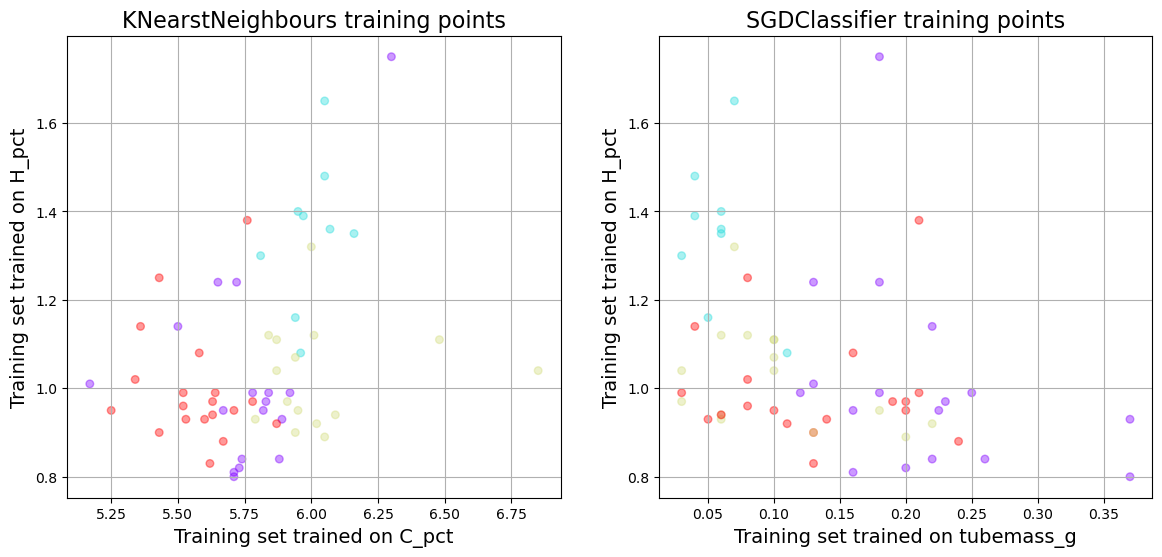

In [361]:
# Create a list of tuples containing a classifiers best two features and it's name
classifier_details = [(knn_best_f1, knn_best_f2, "KNearstNeighbours"), (sgd_best_f1, sgd_best_f2, "SGDClassifier")]

# call the cross valid plot function to print out training points
cross_valid_results(classifier_details, X_train, y_train)

Well this does support the above data we obtained from the feature selection process. The Knn had the better of the two f1 scores and you can clearly see, though still not <br>
great, that the trainig points a far more bunched up then that of the SGD. The SGD classifier's training points are pretty much a mismash besides a small section of red in <br>
the bottom left and the blue up the left side. The Knn (again still not perfect) seems to have small groups of purple, yellow, blue and red, this might prove decisive when <br>
we are calculating it's performance metrics and decision boundaries shortly.

## Construct a confusion matrix based on the classifers performance on the test set.

In [362]:
# Scale our test set data
scale_data(X_test)

In [363]:
# A function to help plot confusion matrix's

def plot_confusion_matrix(classifiers, y_values):
    """
    Takes in a list of classifiers prediciton values and its name and plots a confusion matrix for each 
    classifier
    Params:
    classifiers - A list of tuples containing a classifier's prediction values from a test set,
    and that classifier's name
    y_values - a test series of data to use in construction of the confusion matrixs
    """
    
    # Create a figure for our confusion matrix
    fig, ax = plt.subplots(1,2, figsize=(16, 7))

    col = 0
    for clf in classifiers:
        y_pred = clf[0]
        name = clf[1]
        
        # Create a plot to visualize our models results on the test data, passing in the encoders labels
        ConfusionMatrixDisplay.from_predictions(y_values, y_pred, display_labels=encoder.categories_[0], ax=ax[col])
        ax[col].set_title(f"{name}'s Confusion Matrix")
        col += 1
        


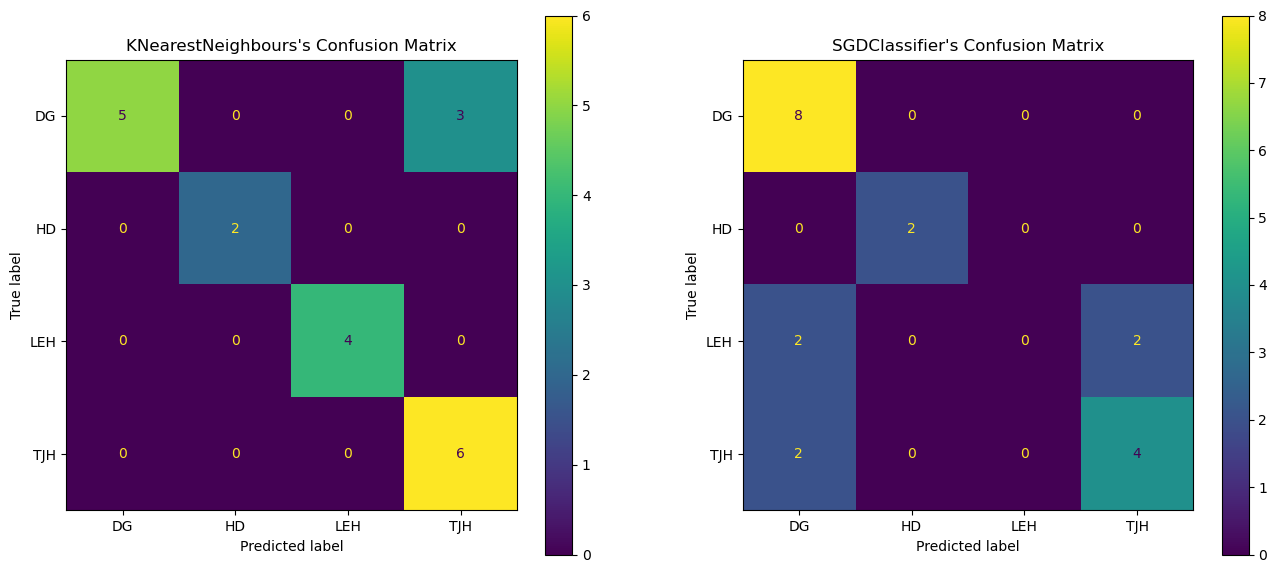

In [364]:
# Calculate the prediction values for both classifiers
knn_pred = knn_clf.predict(X_test[:,[knn_best_f1, knn_best_f2]])
sgd_pred = sgd_clf.predict(X_test[:,[sgd_best_f1, sgd_best_f2]])

# Create a list out of both classifiers
confusion_classifiers = [(knn_pred, "KNearestNeighbours"), (sgd_pred, "SGDClassifier")]

# plot the confusion matrixs for the classifiers
plot_confusion_matrix(confusion_classifiers, y_test)

As we see from the bright and colourful confusion matrix's above, we have trained a Knn classifier that doesn't do too bad at all. Almost all of our values are along the center diagonal except for a <br>
large number of false positive "DG" values being misclassified as "TJH" values. That does appear to be the only achilles heal of this model. Comparing this to our SGD Classifier.... well, it is having <br>
a real tough time understanding what it is. It looks like it is over classifying everything as "DG" and "TJH" mostly, it is safe to say there is a very clear difference already with the performance of <br>
these two classifiers. Knn is definitely out shining the SGD for this classification task.

## Calculate the recall, precision and F1 scores for each class.

In [365]:
# Function to print out all performance metrics
def performance_metrics(classifiers, y_values):
    """
    Takes in a classifiers prediciton values and its name and calculates a set of performance metrics
    using those values and displays the results
    Params:
    classifiers - A list of tuples containing a classifier's prediction values from a test set,
    and that classifier's name
    y_values - a test series of data to use to calculate performance metrics
    """
    # iterate through each classifier and print their metrics
    for clf in classifiers:
        # Assign variables from our passed in list of tuples
        y_pred = clf[0]
        name = clf[1]

        # Display some pretty strings
        print(f"{name}'s Performance Metrics\n")
        # Displaying the precision, recall and f1 score of our test data
        print(f"Test set Precision: \t{precision_score(y_values, y_pred, average='macro', zero_division=False)}")
        print(f"Test set Recall: \t{recall_score(y_values, y_pred, average='macro')}")
        print(f"Test set F1: \t\t{f1_score(y_values, y_pred, average='macro')}")
        print("\n*******************************************\n")

In [327]:
# Call our function to calculate both classifier's performance metrics
performance_classifiers = [(knn_pred, "KNearestNeighbours"), (sgd_pred, "SGDClassifier")]

performance_metrics(performance_classifiers, y_test)

KNearestNeighbours's Performance Metrics

Test set Precision: 	0.9166666666666666
Test set Recall: 	0.90625
Test set F1: 		0.8923076923076922

*******************************************

SGDClassifier's Performance Metrics

Test set Precision: 	0.5833333333333333
Test set Recall: 	0.6666666666666666
Test set F1: 		0.6166666666666667

*******************************************



Absolutely no surprises here, decently high scores for our Knn and pretty results for the SGD classifier. The Knn actually did alot better on the test data than it did on the training<br>
set, im not sure if that should be a red flag or not, perhaps due to a small data set our classifier's just got lucky with the test sets? The SGD also did significantly better, almost <br>
20% better infact, but still underperforms compared to the Knn. I do wonder what the Knn got right and what the SGD couldn't figure out in the training process, what led to such vast <br>
differences I wonder.

## Construct a ROC curve for each class and calculate the respective AUC values

In [328]:
# function to displays the area under curve metrics as well as the roc curves for our classifiers
def display_roc_curves(classifiers, y_test_bin):
    """
    Takes in a list of tuples containing our y score values for our roc and auc calculations as 
    well as the classifier's name and our target data set in binarized form so it can be used
    in roc and auc calculation. 
    Params:
    Classifiers - List of tuples containing the y score (predicted values) and name of classifier
    y_test_bin - Our target dataset in binarized form so that it can be used in calculation of our metrics
    """
    # Create our figure to plot our roc curve on
    fig, ax = plt.subplots(1, 2, figsize=(16,8))
    
    # Create a list of labels for our plots legend
    labels = [i for i in encoder.categories_[0]]

    col = 0
    # Iterate through the labels and plot their roc curve to the chart 
    for clf in classifiers:
        # Assign our tuple values to easy to use variables
        y_scores = clf[0]
        name = clf[1]
        print(name)
        # Iterate through each label in our target set
        for i in range(len(labels)):
            # calculate the labels roc and auc scores
            fpr, tpr, thres = roc_curve(y_test_bin[:, i], y_scores[:, i])

            # Print the auc results for each label and plot the roc results
            print(f"Class {labels[i]} Area Under Curve score: {roc_auc_score(y_test_bin[:, i], y_scores[:, i])}")
            ax[col].plot(fpr, tpr, label=labels[i] + " site")
    
            # Add labels and titles
            ax[col].set_xlabel("False Positive Rate", fontsize=14)
            ax[col].set_ylabel("True Positive Rate", fontsize=14, rotation=90)
            ax[col].set_title(f"{clf[1]} ROC Curve for Test Data", fontsize=18)

        # Add the diagonal line and legend
        ax[col].plot([0, 1], [0, 1], 'k--')
        ax[col].legend()
        ax[col].grid()
        col += 1
        print("*******************************************************\n")

KNearestNeighbours
Class DG Area Under Curve score: 0.8750000000000001
Class HD Area Under Curve score: 1.0
Class LEH Area Under Curve score: 1.0
Class TJH Area Under Curve score: 0.9285714285714285
*******************************************************

SGDClassifier
Class DG Area Under Curve score: 0.84375
Class HD Area Under Curve score: 1.0
Class LEH Area Under Curve score: 0.6875
Class TJH Area Under Curve score: 0.6071428571428571
*******************************************************



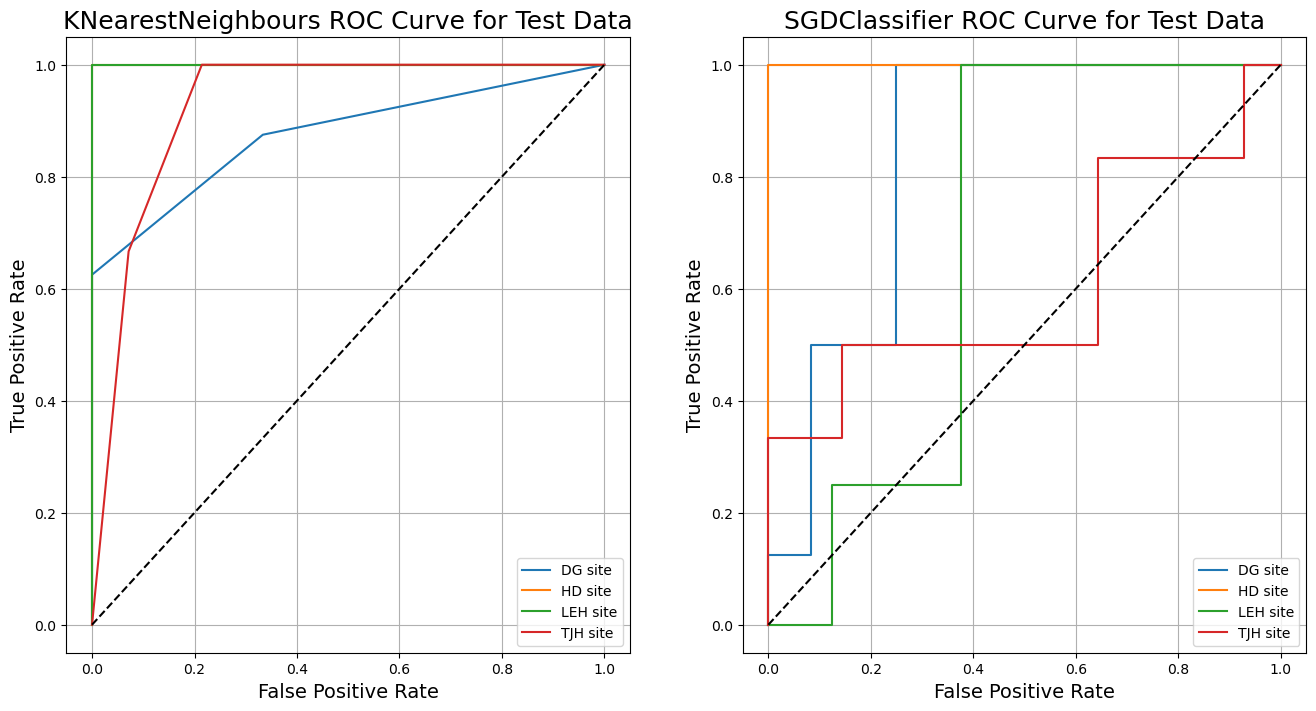

In [329]:
# Create a variable to hold the predicted probabilities for the test data depending on the classifier used
knn_y_score = knn_clf.predict_proba(X_test[:, [knn_best_f1, knn_best_f2]])
sgd_y_score = cross_val_predict(sgd_clf, X_test[:, [sgd_best_f1, sgd_best_f2]], y_test, cv=2, method="decision_function")

# transform our labels into a one vs all encode where the value we be 1 for the correct label and 0 for all
# other classes for every value in the test set of labels
y_binarize = label_binarize(y_test, classes=[0.,1.,2.,3.])

y_scores = [(knn_y_score, "KNearestNeighbours"), (sgd_y_score, "SGDClassifier")]
display_roc_curves(y_scores, y_binarize)

Pretty impressive results for our Knn classifier my only regret is that there isn't more data to train and test on. The ROC Curve is more like the ROC straight and rigid line, but alas, there isn't anything <br>
we can do about our data size. The SGD... well, it's practically a staircase, it looks to be almost completely random, even though it scored perfect for the "HD" label (Due to fitting everything as HD), is it <br>
practically at 50% for two other labels which does indicate that the classifier is more random than anything else. Next we will move onto the final piece, the decision boundaries from our training with our test<br>
points plotted in top.

## Visualisation of decision boundaries learned by the classifer's on the features selected through the cross validation process and their test points

In [366]:
def decision_boundaries(classifiers, X_train, y_train, X_test, y_test):
    """
    Takes in a given datasets train and test points and a classifier train on said points and 
    proceeds to create a plot of the boundaries learnt from the data during training. It then
    plots the testing points onto of the boundaries to better visualize the behaviour of the
    classifier.
    Params:
    List of tuples containing a classifier, it's best two trained features aswell as it's name
    X_train - X set of data used to train a classifier
    y_train - y set of data used to train a classifier
    X_test - X set of data used to test a classifier
    y_test - y set of data used to test a classifier
    """
    fig, ax = plt.subplots(1,2, figsize=(18,8))
    
    # set the distance between lines in our mesh plot of boundaries, essentially it will take
    # this distance of step up the plot starting from our min value to our max
    h = 0.02
    
    # Set our colours up for our mesh and test points, they will use the same colours so you can
    # see clearly where the points are and where the points should be
    the_colours = ListedColormap(["m", "c", "b", "orange"])

     # Create a list of labels for our plots legend
    label = [i for i in encoder.categories_[0]]
    
    col = 0
    # Iterate through our classifiers and plot their decision boundaries
    for clf in classifiers:
        model = clf[0]
        best_f1 = clf[1]
        best_f2 = clf[2]
        name = clf[3]
        # Setting our min and max values of our plot, defining them from our training set values with
        # our two best features.
        x_min, x_max = X_train[:, best_f1].min() - 1, X_train[:, best_f1].max() + 1
        y_min, y_max = X_train[:, best_f2].min() - 1, X_train[:, best_f2].max() + 1
        
        # Create a list of coordinates for the x and y values for our decision boundaries
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # Finally reshaping the predicted values from our test labels
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot our mesh of decision boundaries
        ax[col].pcolormesh(xx, yy, Z, cmap=the_colours, alpha=0.5)
        
        # Optional training points plot
        # ax.scatter(X_train[:, best_f1], X_train[:, best_f2], c=y_train, cmap=the_colours, edgecolor = "k", s = 20)
        
        # Plot the test data points
        scatter = ax[col].scatter(X_test[:, best_f1], X_test[:, best_f2], c=y_test, cmap=the_colours, edgecolor = "k", s = 50)
        
        # Jazz up the plot
        ax[col].set_title(f"{name} 4-class Classification (Plant dataset)", fontsize=16)
        ax[col].set_xlim(xx.min(), xx.max())
        ax[col].set_ylim(yy.min(), yy.max())
        ax[col].legend(handles = scatter.legend_elements()[0], labels = label)
        col += 1

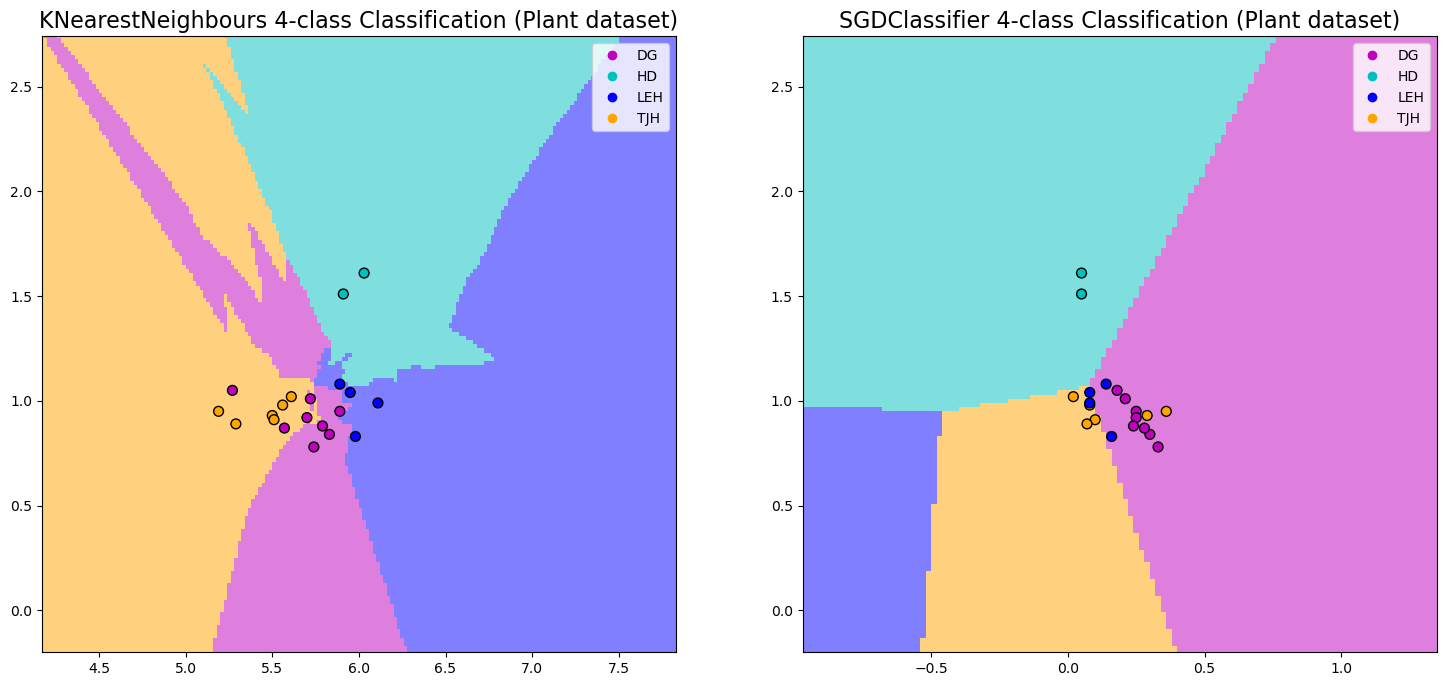

In [367]:
# A List containing our classifiers, their best features and their names
classifiers = [(knn_clf, knn_best_f1, knn_best_f2, "KNearestNeighbours"), (sgd_clf, sgd_best_f1, sgd_best_f2, "SGDClassifier")]

# Calling the decision boundaries function to plot our data
decision_boundaries(classifiers, X_train, y_train, X_test, y_test)

There we have it, our hypothesis that the SGD classifier was over classifying every point as the same "DG" site was infact true, almost every point has eneded up in the pink section and <br>
it takes up a majority of the training space as well. The SGD has also completely forgotten about the "LEH" site aswell, not a single point plotted anywhere near it. <br>

In contrast with the Knn decision boundaries we can see that it has tried to capture all the points, almost to a point of perhaps over training in general, it would be interesting to see<br>
it would perform to new data. Nevertheless, the Knn was by far the better option for training this dataset and would be my choice to use for this sort of <br>
problem

The results speak for themselves, we were take a dataset given to us, process the data, select the two best features to train a classification algorithm on, and execute with some pretty <br>
decent results. Looking at our final chart above us here, it is clear there is still room for improvement with the Knn and giant leaps to be made with the SGD. There is a big  <br>
misclassification there and it would be interesting to know that with more data, would it get better or worse. For now this project has come to an end. I learnt alot over the 33+ hrs this<br>
took me, thank you if you are still reading this far in.

## Project Journal

The following is a log of every day I spent working on this assignment, what I was doing, thinking, etc. It is not necessary to read this... It's quite the rollercoaster of emotion.

### 27/07/24 <br>
For two days i've been trying to figure out this project, how to approach it, how to achieve a correct result.... for two days I have wasted my time. Well... wasted is abit strong, every second i spend trying something new i'm learning... be it correct or a mistake, everything is contributing at the moment. I feel very inadequate with datascience at the moment, though after reading through chapters 2 and 3, six or seven times, it's starting to make more sense in my mind. For the last few days I have been trying to create a binary classifier for a dataset that I need to make a multiclassifier for... now this isn't exactly a problem if I knew that, but I didn't so a few things really made no sense. I think i'm starting to come around to being able to fully complete this assignment now.

### 28/07/24 <br>
So I thought I had figured something out but no... i'm just an idiot. I thought I had to implement a multiclassifier, even though that makes sense to me, the criteria for the assignment doesn't want that... I have to select two features and get the precision, recall, blah blah blah... you don't do that with a multiclassifier, well atleast in my solution I didn't. I did successfully build one for this project.... very quickly too, but it's no good for the assignment, so now i'm back to square one, being very confused about what I have to do. It's not that I don't know what to do or even how to do it, it's the lack of clarity and understanding in all of this at the moment.

### 29/07/24 <br>
Ok here we go, so i'm coming in fresh with the mind frame of building this in such a way that it could be universal (or close enough) for any dataset you would wanna do this to. I know how to do it (I think), but it's more about implementation.

So mid session update and i'm pretty sure im doing it wrong again and I already had it right from days ago.... multiclassifier, just run precision and recall on it after it's trained, run the test data, plot it out and you are done... I think I finished this assignment already but threw it all out thinking I didn't understand.... man I don't understand anything.

### 30/07/24 <br>
Now we are focusing on finding the two best features, I think I have a solution, though my f1 scores are really low... not sure if that's a me problem, a model selection problem or it is what it is. 

Ok now im confused, I can't iterate through an SVM to find the feature two features?

My mistake, it was but a coding error... I was returning a tuple for my two f1 scores from a function, but i was unable to unpack the variables... this is because i went for dinner and came back and forgot to write that part of the code.... harmless mistake.... harmless shuts down all microsoft computers mistake... just push on commit.

Success tonight, after 12 hours in this assignment I finally feel like im on the right track, 3 of the 5 parts down and I should be able to finish the rest of it much faster then this has taken already. I feel after 5 weeks of this class, that im finally coming around to how I need to think to be able to run these note books... what do i mean by that? well, not that im able to do anything in datascience yet, but just that, like normal program, whenever im given a problem, I find it very easy to code a solution, be it some app or even a fullstack backend, frontend, database solution. But  with datascience, ive been struggling to remember that it's just python, and it's just programming, you're just thinking about what you are trying to achieve a little bit differently... anyway i'm rambling. Good session.

### 31/07/24 <br>
Ok starting today off great, realized I trained the data on a single classifier that had all the data and not trained on two of each feature at a time, meaning that my solution is.... not correct... I will now attempt to fix this...

Ok, two minutes later, I think I fixed it, but i gotta be honest.... I feel less and less confident about this project with every passing cell i press shift+enter on.... I don't know if ive done things right and I think this is going to lead to me running multiple classifiers to compare results and see just how wrong or right I am...

30 more minutes...... i've done it! and i've written a function so that I can just pass in whatever classifier I want and everything is fit, trained, tested, calculated... you name it. Still have the roc curves and plots to make, but that shouldn't be hard at all (famous last words) 

Literal famous last words, running into some high headwind at the moment, may have banged my head against the wall enough for one day already (struggling with calculus as it is). Made good progress though, I have a way to run any classifier I want on the dataset, I just need to do a bit of cleaning up and tweaking to allow any classifier without any changing of code or errors. As for roc curves... well, apparently they dont allow for multiclasses, or so it complains at me, though I know that is wrong as I know you can do it, I just gotta figure out how too... for tomorrow, roc curves, pretty plots, then big clean up, document, blah blah blah.

### 1/08/24 <br>
Ok day 6ish.. 7ish.. here we go, roc curves and maybe some plotting.

Rough start with the multi-class roc curve problem... figure my problem out, when binarizing the labels I had to declare the names of the labels and not just assign number values to each label... now we getting somewhere.

Too confident, something is wrong with everything but i cant quite figure out what it is. The knn model smashes the other two out of the water in terms of its scores, and so its auc should be higher... by alot, but it isnt, infact it's roc curves are worse and it looks like its only picking up on like 5 pieces of data..... Im unsure, gonna have to hit the google, the textbox, the tutorial and the lecture to see what I could have possibly got wrong.

mm, realizing some mistakes.... some holes... this ship is sinking... shower and refresh, approach it once more tonight from a place of cleaning and simplifing... pick up the pieces tomorrow and go again. simple.

Wow, amazing what a shower can do... I was ordering my labels incorrectly which was throwing everything majorly out of whack... came back, realized this, found a way to order them correctly and bim bop boom... roc curves all over 90 matching the other metrics and plotting correctly.... we leave it here for now. 21 hours in and still no finished product... haha and im not even optimizing as I go... oh but we will optimize... oh yes we... will.

### 2/08/24 <br>
Alright baby let's do it, I feel I can get a fully functional and working solution with all criteria met before I go to bed... LETS GO!

A brick wall... suddenly.. and with force. I have many questions to ask and problems to solve, so close, but I think I was so wrong from the beginning, or im missing one little thing to make it all come together. I can plot the decision boundaries, something Is wrong with my y_test set, first of all, it wants it converted to an array of floats... ok I can do that, but things go paired shape from there, one thing after another until the boundaries finally plot... but its just one whole colour.. I dont know.. tonight is not my night, I try again tomorrow I guess.

### 3/08/24 <br>
Ok so tonight I encode the values of the site column (which i have done before but thought I didnt need too so I undid it and preceeded to build my notebook with string values instead...) and see if that fixes everything. Luckily I built everything pretty modular so It should be as simple as retraining the test train split and... im not sure what else, im sure there will be little things... lets get into it.

Well I got it all to work... but it's all wrong... unless it's supposed to be terrible... I doubt it, so i've made mistakes during training.... I don't know how much more time i can spent on this, im almost at 30hrs... on one assignment.

its done... i had merely forgot that I changed the name of the variable of my classifier, therfore the mesh was boundaries was being trained on a completely unrelated variable that just happened to work for the mesh... hah, the downside of using jyupter... no linting or debugging tools really.... you gotta really investigate or change up the way you code as to avoid this kind of mistake. 

### 4/08/24 <br>
Looking to finish this today, lots of annotating and writing to do, and than the video!

No report or video done, but the notebook completely finished and commented. The report is technically written as I leave large paragraph throughout the noteboook, so just compiling those thoughts into some more.... digestable. That was a journey... a real god damn journey. Very happy i'm at the end and have a working solution, though I know there is alot more I can do, alot more little things ive read in the textbook that would improve the outcome, not to mention I wanted to make it run tests for every classifier... it seemed out of scope for the assignment, so it will have to be a project for another time.

### 19/08/24 <br>

Revising my code before submission.... damn! I have learnt alot in only 15 days... and i'm sure i'll saying that for 2 more years and than for forever after, but man.... i'm gonna make some last minute optimisations in my code, I might have to re-record my video, we will see, depends on if I just optimize, or decide to completely change workflow, will keep you updated as I go.

So I ended up just adding functionality to plot multiple classifier results, that way you didn't have to assign which classifier you want to observe and instead see the data from both classifiers at the same time. So mpretty much just more dynamic workflow as well as some small mistakes and a little more description on what was going on, other than that, nothing really changed. Happy with the changes though, more modular functions are handy because you can just transplant them into your next project, in fact a fun project might be writting an entire workflow from start to end with no data at all, trying to account for everything as you go and than see if you can import a dataset and essentially just hit play and you're done.... anyway, bye for now.... again.